In [91]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [92]:
plt.style.use('seaborn')

In [93]:
df = pd.read_csv(r'C:\Users\fabio\Documents\DataSets\csv_data\master.csv')

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


Text(0, 0.5, 'Country')

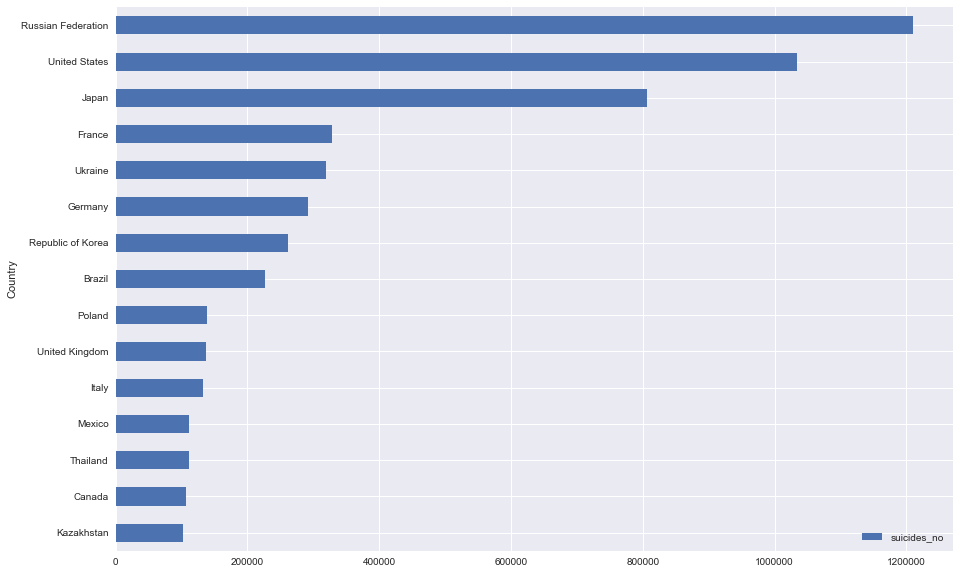

In [7]:
ax = df.groupby(['country']).aggregate(sum).suicides_no.reset_index().sort_values(['suicides_no'], ascending=True).tail(15).plot(kind='barh', x='country', y='suicides_no', figsize=(15, 10))
ax.set_ylabel('Country')

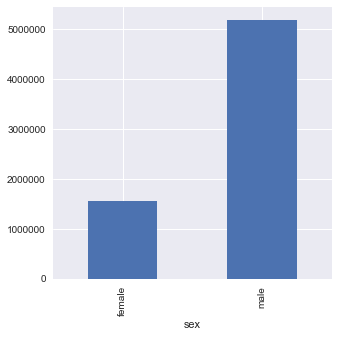

In [8]:
df.groupby(['sex']).aggregate(sum).suicides_no.plot(kind='bar', figsize=(5, 5))

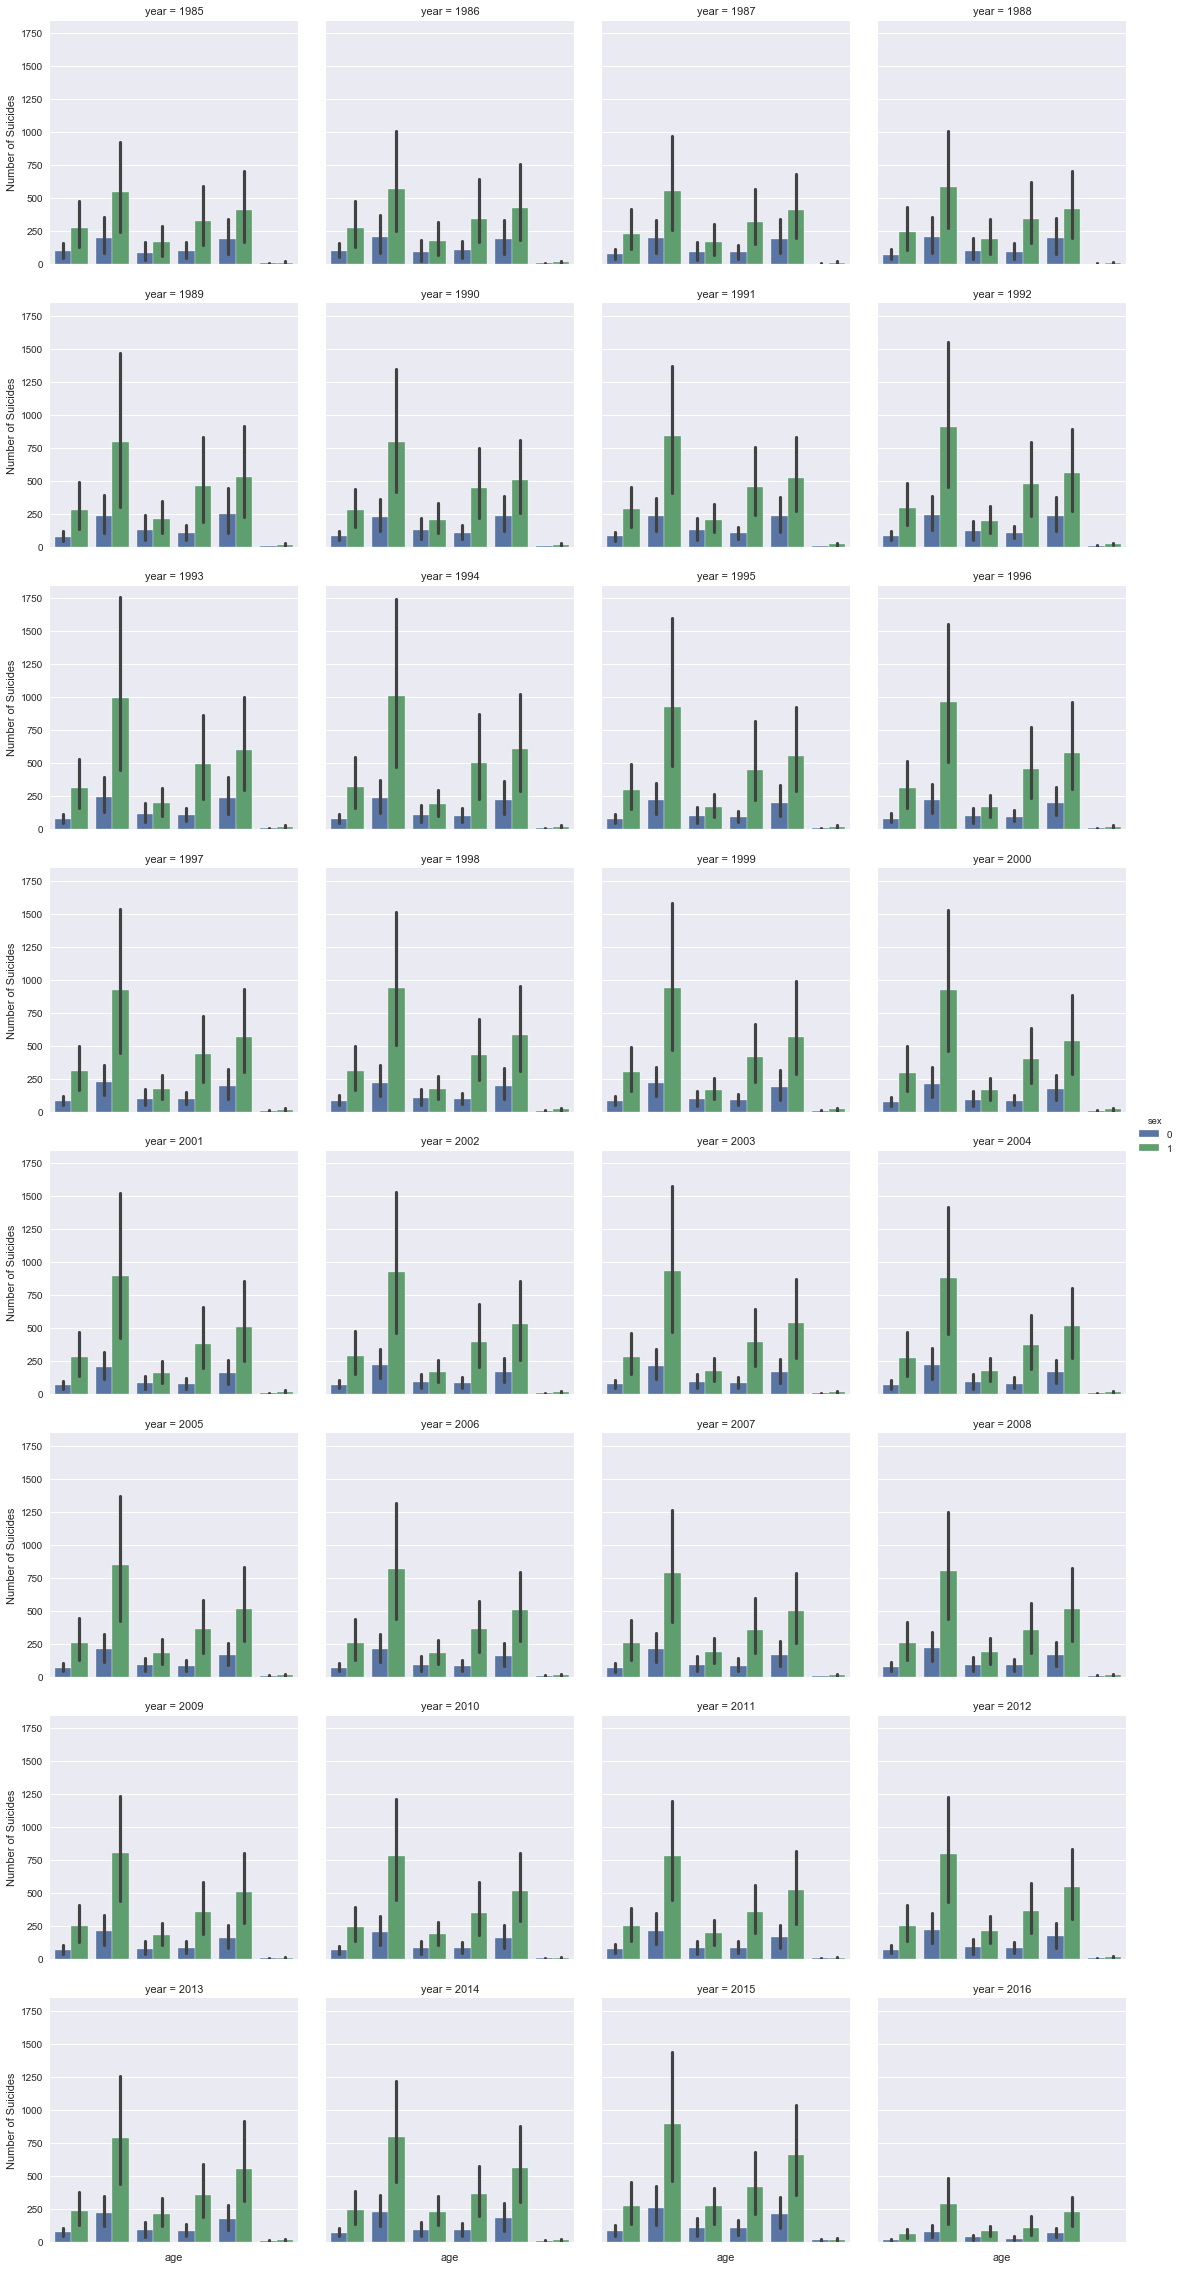

In [41]:
ax = sns.catplot(x='age', y='suicides_no', col='year', hue='sex', data=df, kind='bar', height=4, col_wrap=4)
ax.set_ylabels("Number of Suicides")
ax.set_xticklabels(rotation=40)

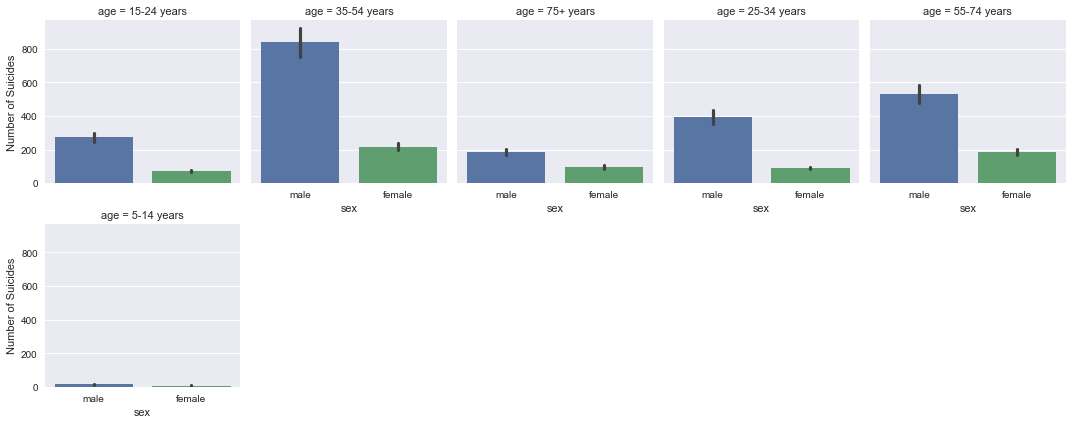

In [9]:
ax = sns.catplot(x='sex', y='suicides_no', col='age', data=df, kind='bar', height=3, col_wrap=5)
ax.set_ylabels('Number of Suicides')
plt.tight_layout()

In [96]:
data = df.copy()

In [97]:
data = data.drop(['suicides/100k pop', 'country-year', 'HDI for year', 'country', 'year', 'age', 'generation'], axis=1).dropna()
data['sex'] = data['sex'].map(dict(male=1, female=0))

In [98]:
data[data.columns[3]] = data[data.columns[3]].apply(lambda x : x.replace(',', '')).astype(np.int64) 

In [86]:
data.head()

,sex,suicides_no,population,gdp_for_year ($),gdp_per_capita ($)
0,1,21,312900,2156624900,796
1,1,16,308000,2156624900,796
2,0,14,289700,2156624900,796
3,1,1,21800,2156624900,796
4,1,9,274300,2156624900,796


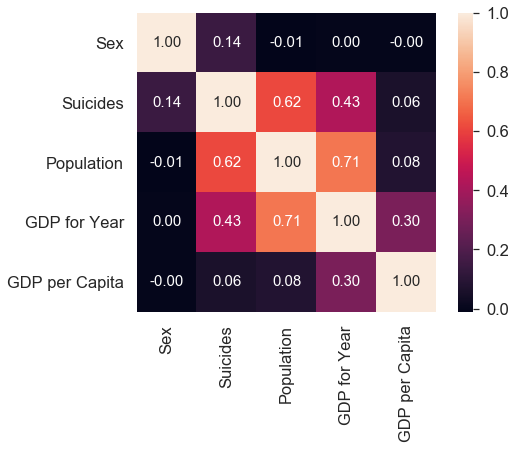

In [90]:
#Correlation Matrix
xyticklabels = ['Sex', 'Suicides', 'Population', 'GDP for Year', 'GDP per Capita']
cm = np.corrcoef(data[data.columns].values.T)
sns.set(font_scale=1.5)
heat_map = sns.heatmap(cm,
                      cbar=True,
                      annot=True,
                      square=True,
                      fmt='.2f',
                      annot_kws={'size': 15},
                      yticklabels=xyticklabels,
                      xticklabels=xyticklabels
                      )
plt.show()

C:\Users\fabio\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\fabio\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



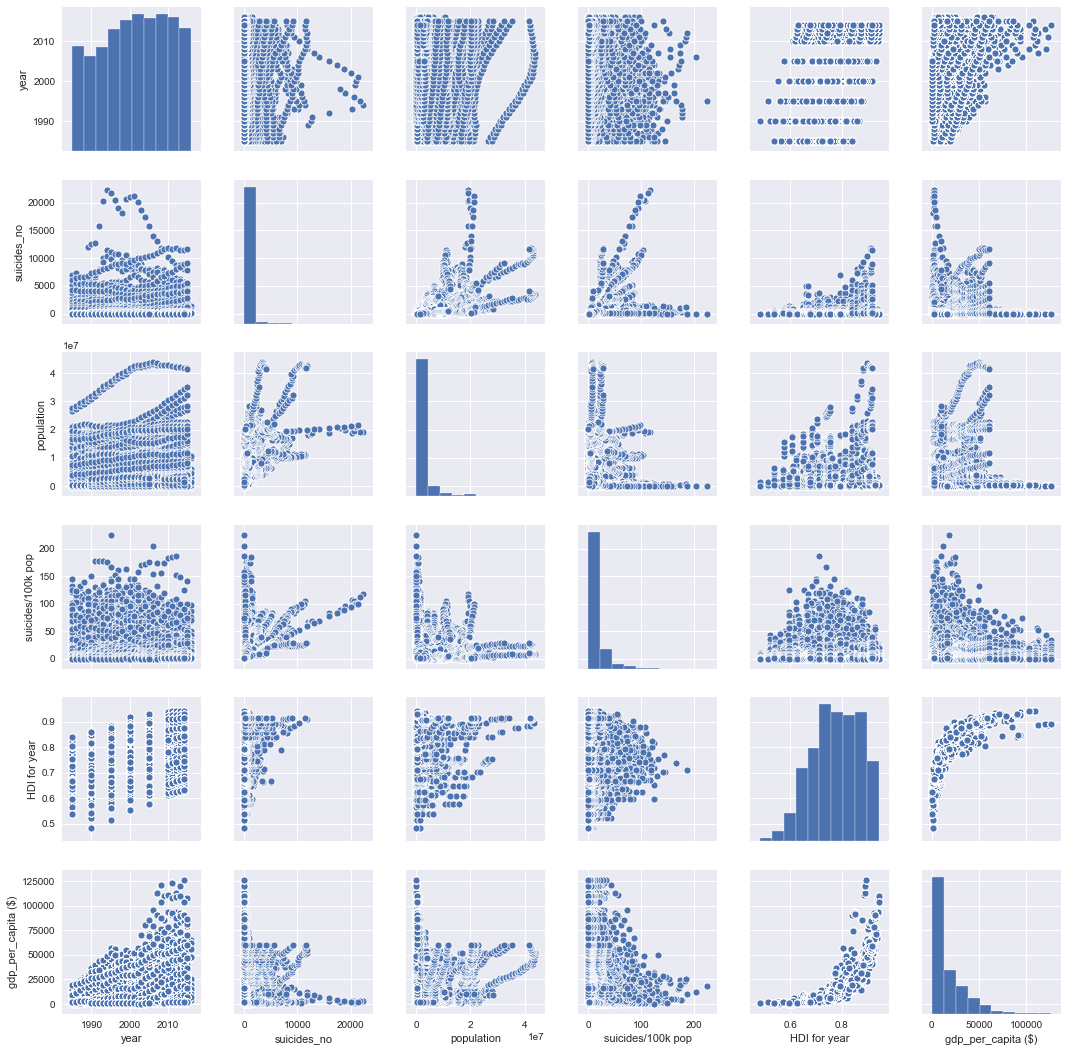

In [33]:
sns.pairplot(data=df)
plt.show()

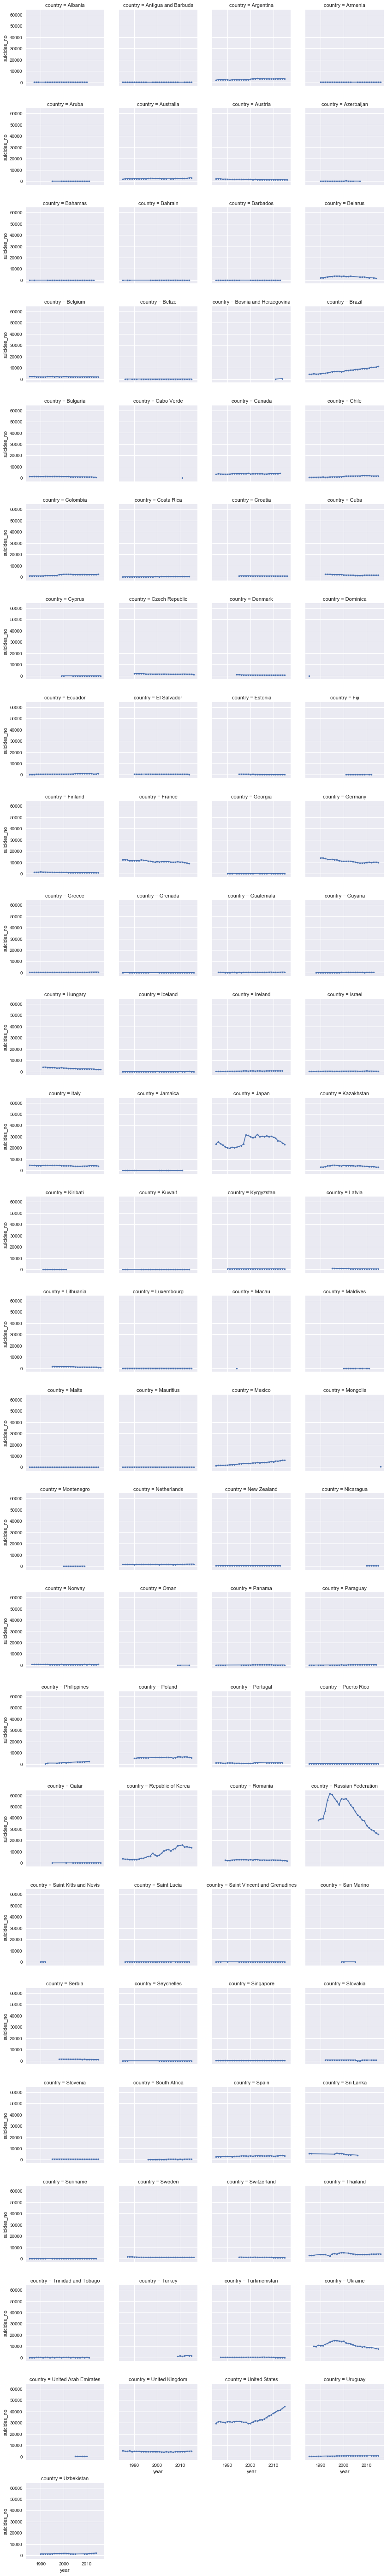

In [32]:
data_g = df.groupby(['country', 'year']).sum().suicides_no.reset_index()
g = sns.FacetGrid(data=data_g, col='country', height=3, aspect=1, col_wrap=4)
g.map(plt.plot, 'year', 'suicides_no', marker='.')
plt.show()

In [74]:
df = pd.read_csv(r'C:\Users\fabio\Documents\DataSets\csv_data\master.csv')

In [5]:
categories_a = df.groupby(['sex'])['suicides_no'].sum().index.tolist()
categories_b = df.groupby(['age'])['suicides_no'].sum().index.tolist()
categories_c = df.groupby(['country'])['suicides_no'].sum().nlargest(6).index.tolist()
categories_d = df.groupby(['generation'])['suicides_no'].sum().index.tolist()

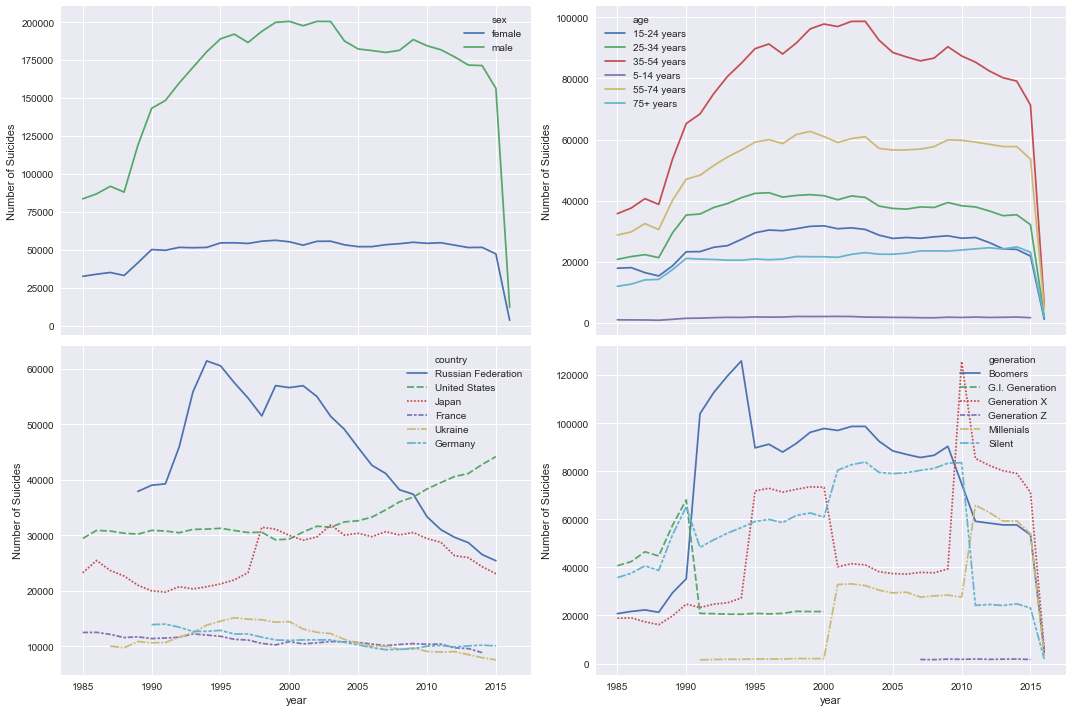

In [120]:
from matplotlib.colors import LogNorm
from numpy import median

fig, axes = plt.subplots(nrows=2, 
                         ncols=2, 
                         figsize=(15, 10), 
                         sharex=True)

index = np.copy(axes.flatten())
columns = ['sex', 'age', 'country', 'generation']
categories = [categories_a, categories_b, categories_c, categories_d]

for col, cat, idx in zip(columns, categories, index):
    data = df.groupby(['year', col])['suicides_no'].sum().reset_index()
    data[col] = data[col].astype(pd.api.types.CategoricalDtype(categories=cat))
    cond = col in ['generation', 'country']
    ax = sns.lineplot(x='year', y='suicides_no', hue=col, style=col, hue_norm=LogNorm(), estimator=median, data=data, sort=False, dashes=cond, ax=idx)
    ax.set_ylabel("Number of Suicides")
plt.tight_layout()
plt.show()    

In [99]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [21]:
#plotly.tools.set_credentials_file(username='---', api_key='---')

In [100]:
def trace_plot(data, categories=None, set_mode='lines+markers', title='', x_label='', y_label=''):
    traces = []
    for cat in categories:
        tr = go.Scatter(x=data[cat].reset_index().year.values,
                        y=data[cat].reset_index().suicides_no.values,
                        mode=set_mode,
                        name=cat)
        traces.append(tr)
    layout = dict(title=title, xaxis=dict(title=x_label), yaxis=dict(title=y_label))
    fig = dict(data=traces, layout=layout)
    return iplot(fig)

In [101]:
dt_country = df.groupby(['country', 'year']).sum().suicides_no

In [102]:
trace_plot(dt_country, 
           categories=categories_c, 
           set_mode='lines+markers', 
           title='Suicide Rates Worldwide (Top Six Countries)', 
           x_label='Year', 
           y_label='Number of Suicides')

In [109]:
dt_age = df.groupby(['age', 'year']).sum().suicides_no
trace_plot(dt_age, categories=categories_b, title='Suicide Rates (by age range)', x_label='Year', y_label='Number of Suicides')

In [103]:
dt_sex = df.groupby(['sex', 'year']).sum().suicides_no 

In [104]:
ay1, ay2 = dt_sex['male'].values, dt_sex['female'].values
years = dt_sex.reset_index().year.values

In [105]:
trace1 = go.Scatter(x=years,
                    y=ay1,
                    mode='lines+markers',
                    name='male')

trace2 = go.Scatter(x=years,
                    y=ay2,
                    mode='lines+markers',
                    name='female')
traces = [trace1, trace2]
layout = dict(title='Suicide Rates Worldwide (by gender)', xaxis=dict(title='Year'), yaxis=dict(title='Number of Suicides'))
fig = dict(data=traces, layout=layout)
iplot(fig)

In [106]:
trace_plot(dt_country, categories=['Brazil'], title='Suicide Rates in Brazil', x_label='Year', y_label='Number of Suicides')

In [107]:
data = df.groupby(['country', 'sex', 'year']).sum().suicides_no
ay1, ay2 = data['Brazil']['male'].values, data['Brazil']['female'].values
years = data['Brazil'].reset_index().year.values

In [108]:
trace1 = go.Scatter(x=years,
                    y=ay1,
                    mode='lines+markers',
                    name='male')

trace2 = go.Scatter(x=years,
                    y=ay2,
                    mode='lines+markers',
                    name='female')
traces = [trace1, trace2]
layout = dict(title='Suicide Rates in Brazil (by gender)', xaxis=dict(title='Year'), yaxis=dict(title='Number of Suicides'))
fig = dict(data=traces, layout=layout)
iplot(fig)